<a href="https://colab.research.google.com/github/Tanisi1234/Pneumonia-Detection-using-CNN-/blob/main/Pneumonia_Detection_using_CNN(92_6_Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')
tanisi869_dataset_i_path = kagglehub.dataset_download('tanisi869/dataset-i')
tanisi869_herherna_path = kagglehub.dataset_download('tanisi869/herherna')

print('Data source import complete.')


# Name : Tanisi Jha
# Roll no: 221010251
# Branch: ECE


# Name: Juttuka Saaketh
# Roll no.: 221010222
# Branch: ECE


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
Zs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/herherna/Screenshot 2024-04-28 230300.png
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/ches

# Importing the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np

Using TensorFlow backend.


# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [ ]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# Data Visualization & Preprocessing

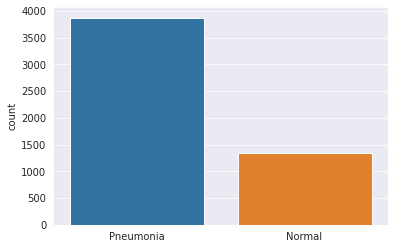

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

# PREVIEW OF LUNG IMAGES

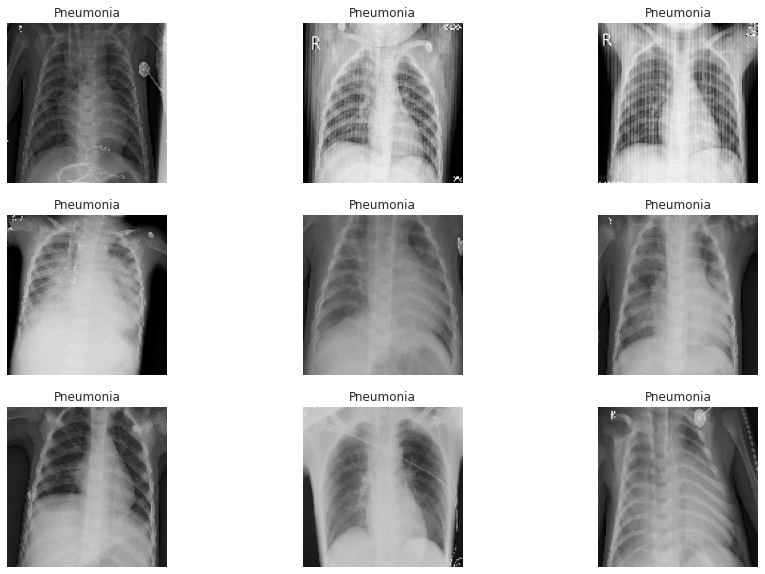

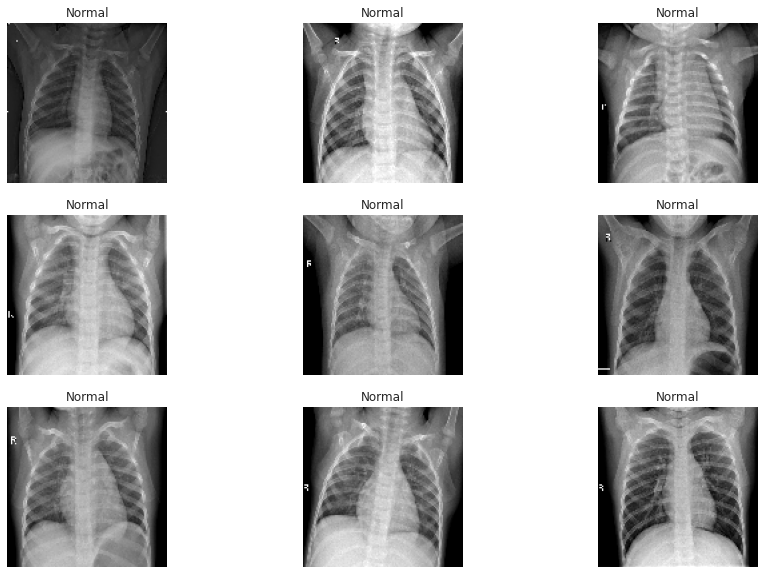

In [ ]:
# Load and display 9 pneumonia images
import os
pneumonia_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"
pneumonia_images = os.listdir(pneumonia_dir)[:9]

plt.figure(figsize=(15, 10))
for i, img_name in enumerate(pneumonia_images):
    img_path = os.path.join(pneumonia_dir, img_name)
    img = image.load_img(img_path, target_size=(120, 120))
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title("Pneumonia")
    plt.axis('off')
plt.show()

# Load and display 9 normal images
normal_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"
normal_images = os.listdir(normal_dir)[:9]

plt.figure(figsize=(15, 10))
for i, img_name in enumerate(normal_images):
    img_path = os.path.join(normal_dir, img_name)
    img = image.load_img(img_path, target_size=(120, 120))
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')
plt.show()


**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

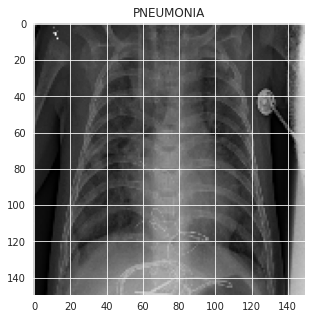

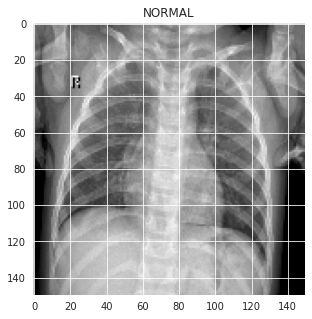

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

# Visualization of CNN in lung images


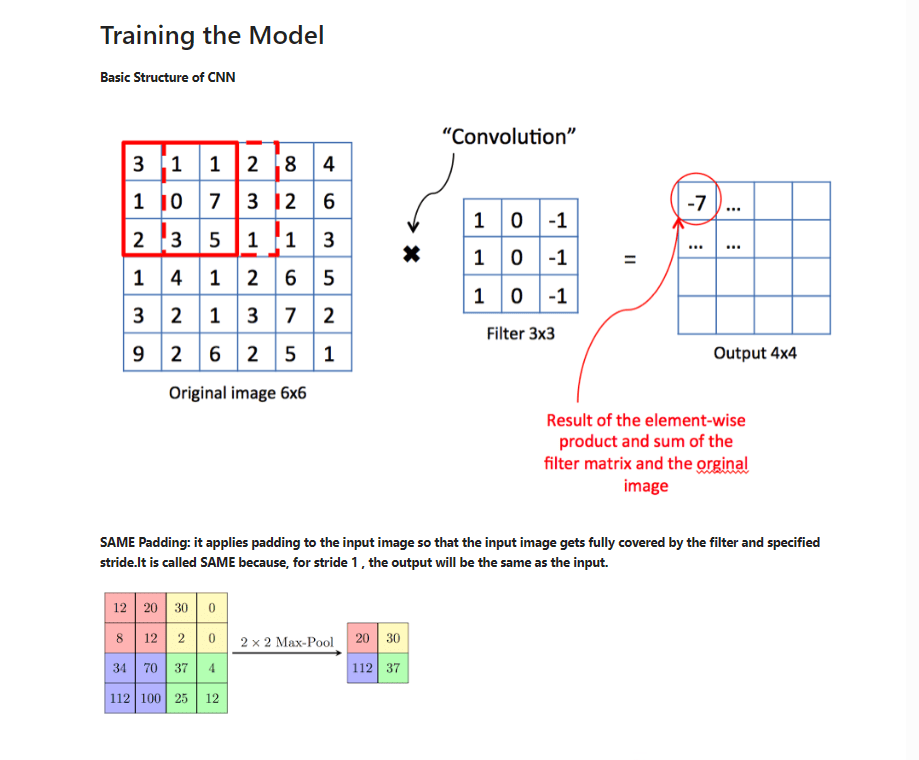

In [ ]:

from IPython.display import Image

# Replace 'path_to_image' with the actual path to your image file
Image(filename='/kaggle/input/dataset-i/Screenshot 2024-04-28 220753.png')



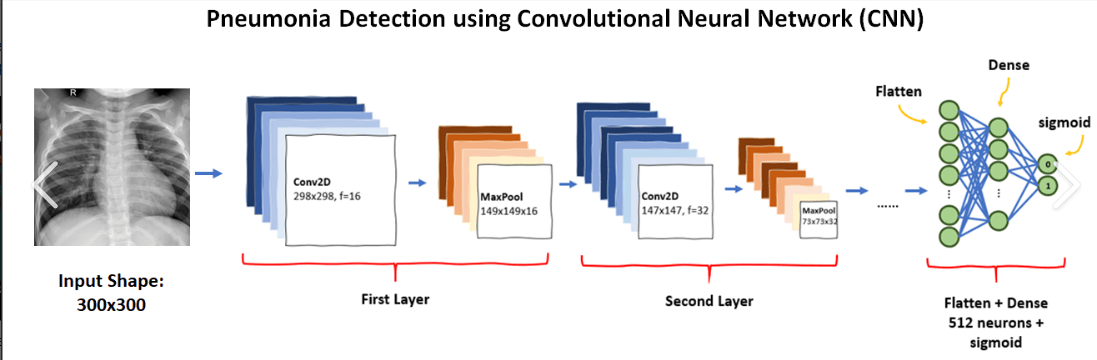

In [ ]:
from IPython.display import Image

# Replace 'path_to_image' with the actual path to your image file
Image(filename='/kaggle/input/herherna/Screenshot 2024-04-28 230300.png')

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

# Training the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

NameError: name 'datagen' is not defined

# Analysis after Model Training

**Some of the Correctly Predicted Classes**

**Some of the Incorrectly Predicted Classes**

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Train for 163 steps, validate for 1 steps
Epoch 1/15
163/163 [==============================] - 163s 999ms/step - loss: 0.4779 - accuracy: 0.7830 - val_loss: 0.4790 - val_accuracy: 0.8125
Epoch 2/15
163/163 [==============================] - 140s 861ms/step - loss: 0.2422 - accuracy: 0.9015 - val_loss: 0.8637 - val_accuracy: 0.5625
Epoch 3/15
163/163 [==============================] - 139s 855ms/step - loss: 0.1953 - accuracy: 0.9212 - val_loss: 1.3647 - val_accuracy: 0.6250
Epoch 4/15
163/163 [==============================] - 140s 858ms/step - loss: 0.1945 - accuracy: 0.9273 - val_loss: 0.8100 - val_accuracy: 0.6250
Epoch 5/15
163/163 [==============================] - 140s 858ms/step - loss: 0.1708 - accuracy: 0.9302 - val_loss: 2.0250 - val_accuracy: 0.6250
Epoch 6/15
163/163 [==============================] - 140s 859ms/step - loss: 0.1806 - accuracy: 0.9344 -

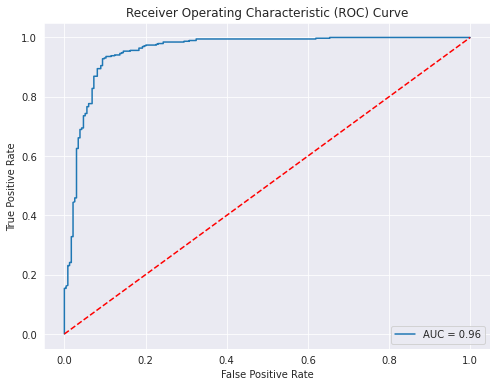


Confusion Matrix
[[175  59]
 [  6 384]]


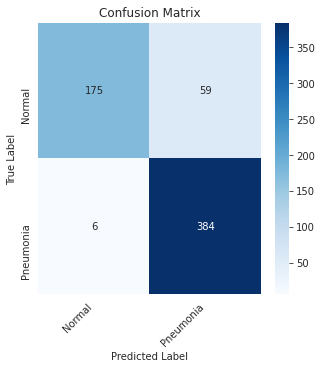

Prediction: Normal


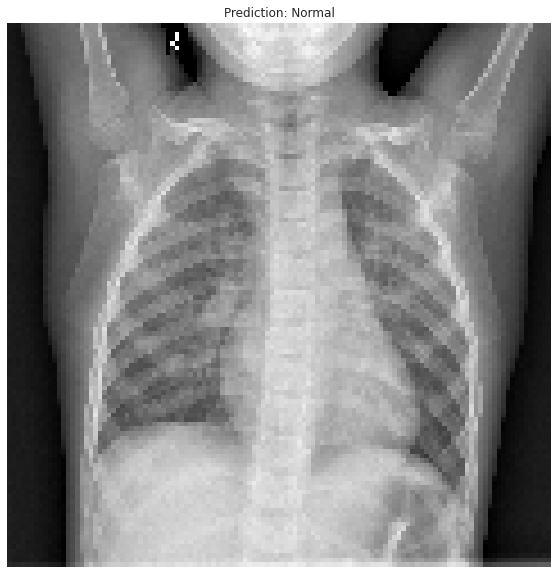

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
validation_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

# Data Augmentation
training_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_data = training_generator.flow_from_directory(training_dir,
                                                    target_size=(120, 120),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_data = validation_generator.flow_from_directory(validation_dir,
                                                            target_size=(120, 120),
                                                            batch_size=32,
                                                            class_mode='binary')

test_data = test_generator.flow_from_directory(test_dir,
                                                target_size=(120, 120),
                                                batch_size=1,
                                                class_mode='binary',
                                                shuffle=False)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=15, validation_data=validation_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print('\nTest accuracy:', test_acc)

# Confusion Matrix and Classification Report
test_data.reset()
predictions = model.predict(test_data)
y_pred = np.round(predictions)
y_true = test_data.classes

print('\nConfusion Matrix')
cm = confusion_matrix(y_true, y_pred)
print(cm)

print('\nClassification Report')
target_names = ['Normal', 'Pneumonia']
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, predictions)
auc = roc_auc_score(y_true, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap

from sklearn.metrics import classification_report, confusion_matrix

# ... (your existing code up to the confusion matrix calculation)

print('\nConfusion Matrix')
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Confusion Matrix with Color Representation
group_names = ['Normal', 'Pneumonia']  # Adjust class names if needed
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)  # Use 'Blues' for better visualization
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_yticklabels(group_names)
plt.show()

# ... (your existing code for classification report, ROC curve, etc.)

#prediction
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
plt.figure(figsize=(20, 10))



img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(120, 120))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Reshape the image to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Convert prediction probabilities to class labels
threshold = 0.5
predicted_class = "Pneumonia" if prediction > threshold else "Normal"

# Display the prediction result
print("Prediction:", predicted_class)

# Optionally, visualize the image
plt.imshow(img)
plt.axis('off')
plt.title("Prediction: " + predicted_class)
plt.show()



Number of correctly predicted images: 215124
Number of incorrectly predicted images: 174252


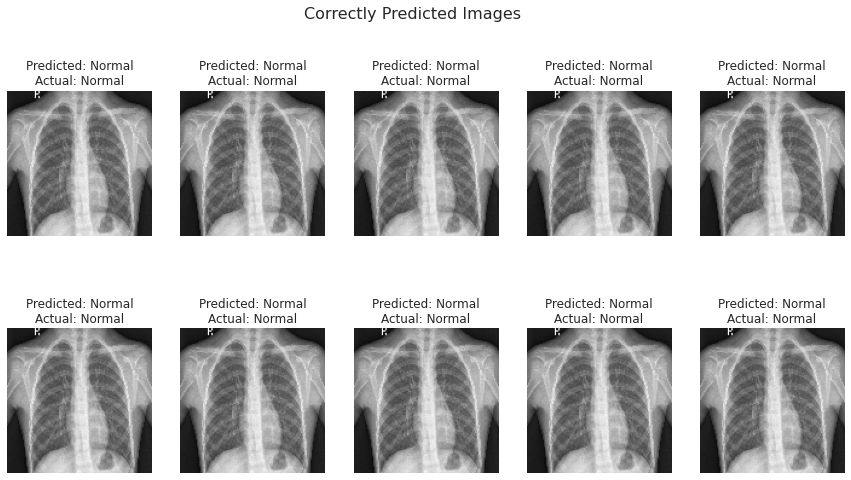

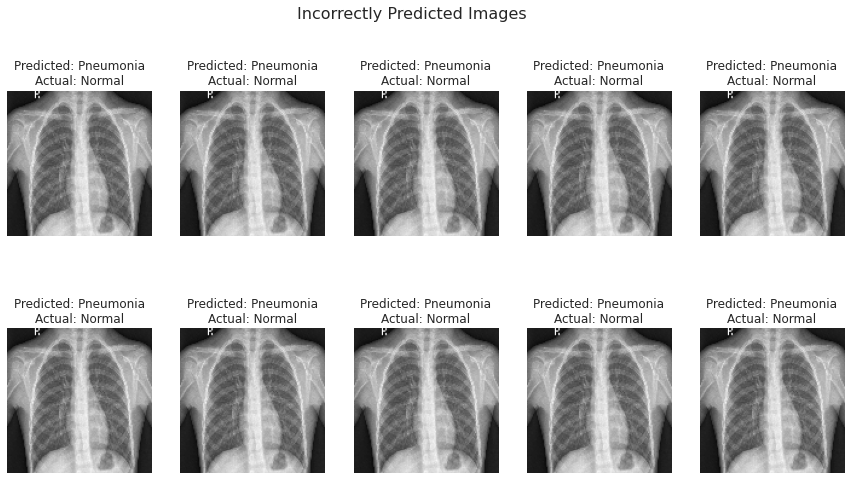

In [ ]:
# Convert predictions to class labels
y_pred = np.round(predictions)

# Get true labels for test data
y_true = test_data.classes

# Get indices of correctly and incorrectly predicted images
correctly_predicted_indices = np.where(y_pred == y_true)[0]
incorrectly_predicted_indices = np.where(y_pred != y_true)[0]

# Print the number of correctly and incorrectly predicted images
print("Number of correctly predicted images:", len(correctly_predicted_indices))
print("Number of incorrectly predicted images:", len(incorrectly_predicted_indices))

# Visualize Correctly and Incorrectly Predicted Images
max_display_images = 10
plt.figure(figsize=(15, 8))
plt.suptitle('Correctly Predicted Images', fontsize=16)
for i, index in enumerate(correctly_predicted_indices[:max_display_images]):
    img_path = test_data.filepaths[index]
    img = image.load_img(img_path, target_size=(120, 120))
    plt.subplot(2, max_display_images//2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: Normal\nActual: Normal')

plt.figure(figsize=(15, 8))
plt.suptitle('Incorrectly Predicted Images', fontsize=16)
for i, index in enumerate(incorrectly_predicted_indices[:max_display_images]):
    img_path = test_data.filepaths[index]
    img = image.load_img(img_path, target_size=(120, 120))
    plt.subplot(2, max_display_images//2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: Pneumonia\nActual: Normal')

plt.show()
